In [29]:
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
import scipy.stats

In [30]:
players = {}
ids = {}
teams = {}
with open("data/players.json") as f:
    data = json.load(f)

for row in data:
    if (row['lastName'] == ""):
        name = row["firstName"]
    else:
        name = row['lastName']+", "+row["firstName"]
    iden = str(row['playerId'])
    players[name] = iden
    ids[iden] = name
    teams[iden] = row['teamId']

franchises = {"Brooklyn Nets": 1610612751, "Minnesota Timberwolves":1610612750 ,"Golden State Warriors": 1610612744, 
              "Los Angeles Clippers": 1610612746, "Los Angeles Lakers": 1610612747, "Washington Wizards": 1610612764, 
              "Milwaukee Bucks": 1610612749, "Toronto Raptors": 1610612761, "Philadelphia 76ers": 1610612755 , 
              "Boston Celtics":1610612738 ,  "Orlando Magic": 1610612753, "Atlanta Hawks":1610612737,
              "Houston Rockets": 1610612745 , "San Antontio Spurs":  1610612759, "New Orleans Pelicans": 1610612740, 
              "Pheonix Suns": 1610612756, "Sacramento Kings": 1610612758, "Portland Trailblazers": 1610612757, 
              "Denver Nuggets":1610612743 , "Memphis Grizzlies": 1610612763, "Miami Heat":1610612748, 
              "Cleveland Cavaliers": 1610612739, "Charlotte Hornets":1610612766, "Chicago Bulls": 1610612741, 
              "New York Knicks": 1610612752, "Indiana Pacers":1610612754 , "Utah Jazz":1610612762 , 
              "Detroit Pistons": 1610612765, "Dallas Mavericks": 1610612742, "Oklahoma City Thunder": 1610612760,  
             }
team_id_to_team = {}
for team in franchises:
    team_id_to_team[franchises[team]] = team
num_wins = {"Brooklyn Nets": 28, 
              "Minnesota Timberwolves":47 ,
              "Golden State Warriors": 58, 
              "Los Angeles Clippers": 42, 
              "Los Angeles Lakers": 35, 
              "Washington Wizards": 43, 
              "Milwaukee Bucks": 44, 
              "Toronto Raptors": 59, 
              "Philadelphia 76ers": 52 , 
              "Boston Celtics":55 ,  
              "Orlando Magic": 29, "Atlanta Hawks":24,
              "Houston Rockets": 65, 
              "San Antontio Spurs":  47, 
              "New Orleans Pelicans": 48, 
              "Pheonix Suns": 21, 
              "Sacramento Kings": 27, 
              "Portland Trailblazers": 49, 
              "Denver Nuggets":46 , 
              "Memphis Grizzlies": 22, 
              "Miami Heat":44, 
              "Cleveland Cavaliers": 50, 
              "Charlotte Hornets":36,
              "Chicago Bulls": 27, 
              "New York Knicks": 29, 
              "Indiana Pacers":48 , 
              "Utah Jazz":48 , 
              "Detroit Pistons": 39, 
              "Dallas Mavericks": 24, "Oklahoma City Thunder": 48,  
             }
colors=["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9"]

In [58]:
def assist_ratios_player_graph(player_id):
    G = nx.DiGraph()
    labels = {}
    widths = []
    
    iden = player_id
    name = ids[iden]
    labels[iden] = name
    print(name)

    fname = "data/"+players[name]+"-passing.json"

    with open(fname, "r") as f:
        data = json.load(f)
    
    for key in data:
        if(data[key][0] != 0 and data[key][1] > 0.1):
            widths.append(5*data[key][1]/data[key][0])
            G.add_edge(iden, key, weight=data[key][1]/data[key][0])
            labels[key] = ids[key]
        
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8,8))
    plt.title(name)
    nx.draw_networkx_edges(G, pos, width=widths)
    nx.draw_networkx_nodes(G, pos, node_size=50)
    nx.draw_networkx_labels(G,pos,labels, font_size=6)
    plt.show()
    return None

def assist_ratios_player_win_loss(player_id):   
    iden = player_id
    name = ids[iden]

    fname_w = "data/"+players[name]+"-passing-win.json"
    fname_l = "data/"+players[name]+"-passing-loss.json"

    with open(fname_w, "r") as f:
        data_w = json.load(f)
    
    ratios_w = []
    for key in data_w:
        if (data_w[key][0] != 0):
            ratios_w.append(data_w[key][1]/data_w[key][0])
    with open(fname_l, "r") as f:
        data_l = json.load(f)
    
    ratios_l = []
    for key in data_l:
        if (data_l[key][0] != 0):
            ratios_l.append(data_l[key][1]/data_l[key][0])
    
    d_mean = np.mean(ratios_w)-np.mean(ratios_l)
    d_medi = np.median(ratios_w)-np.median(ratios_l)
    d_max = np.max(ratios_w)-np.max(ratios_l)
    return d_mean, d_medi, d_max

In [59]:
most_passes = {}
passing_players = {}
for team in franchises:
    team_id = franchises[team]
    most_passes[team_id] = 0
    passing_players[team_id] = ""

for player in players:
    player_id = players[player]
    team_id = teams[player_id]
    if(team_id == 0):
        continue
    
    fname = "data/"+player_id+"-passing.json"

    with open(fname, "r") as f:
        data = json.load(f)
    tot = 0
    for key in data:
        tot += data[key][1]
    
    if (tot > most_passes[team_id]):
        most_passes[team_id] = tot
        passing_players[team_id] = player
    
print(passing_players)

{1610612751: 'Dinwiddie, Spencer', 1610612750: 'Teague, Jeff', 1610612744: 'Green, Draymond', 1610612746: 'Williams, Lou', 1610612747: 'Ball, Lonzo', 1610612764: 'Wall, John', 1610612749: 'Antetokounmpo, Giannis', 1610612761: 'Lowry, Kyle', 1610612755: 'Simmons, Ben', 1610612738: 'Smart, Marcus', 1610612753: 'Augustin, D.J.', 1610612737: 'Schroder, Dennis', 1610612745: 'Harden, James', 1610612759: 'Parker, Tony', 1610612740: 'Rondo, Rajon', 1610612756: 'Payton, Elfrid', 1610612758: "Fox, De'Aaron", 1610612757: 'Lillard, Damian', 1610612743: 'Jokic, Nikola', 1610612763: 'Evans, Tyreke', 1610612748: 'Dragic, Goran', 1610612739: 'James, LeBron', 1610612766: 'Batum, Nicolas', 1610612741: 'Dunn, Kris', 1610612752: 'Jack, Jarrett', 1610612754: 'Collison, Darren', 1610612762: 'Rubio, Ricky', 1610612765: 'Griffin, Blake', 1610612742: 'Barea, J.J.', 1610612760: 'Westbrook, Russell'}


20


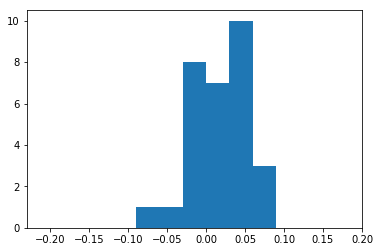

21


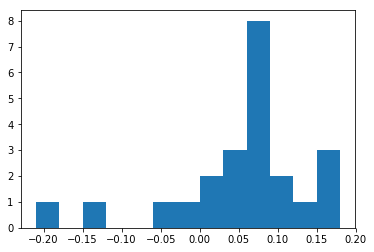

In [60]:
means = []
medians = []
maxs = []
for player in list(passing_players.values()):
    player_id = players[player]
    d_mean, d_median, d_max = assist_ratios_player_win_loss(player_id)
    means.append(d_mean)
    medians.append(d_median)
    maxs.append(d_max)

print(len([l for l in means if l > 0]))
plt.hist(means, bins=np.arange(-0.21,0.21,0.03))
plt.show()
print(len([l for l in maxs if l > 0]))
plt.hist(maxs, bins=np.arange(-0.21,0.21,0.03))
plt.show()

Green, Draymond


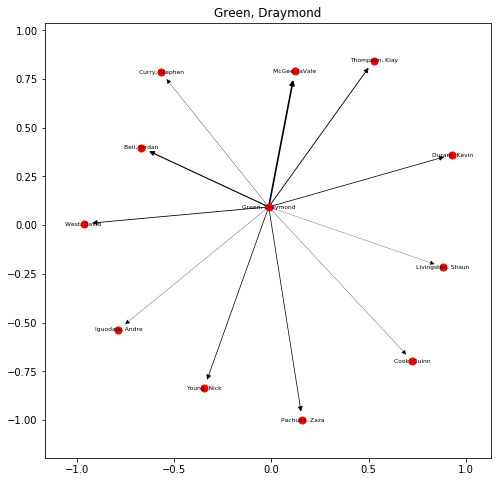

James, LeBron


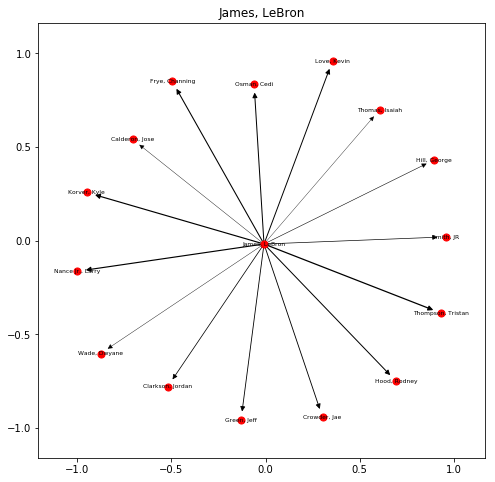

Collison, Darren


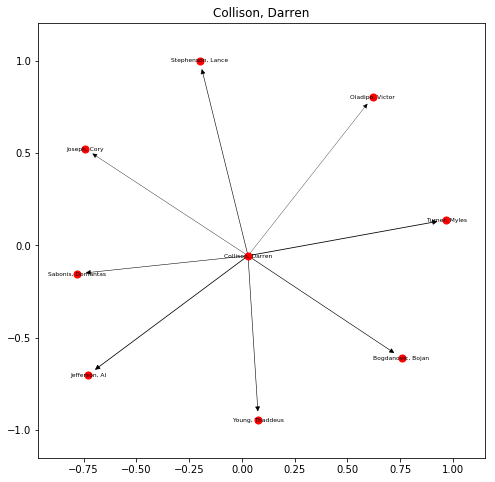

In [61]:
team_graphs = ["Golden State Warriors", "Cleveland Cavaliers", "Indiana Pacers"]
for team in team_graphs:
    team_id = franchises[team]
    passing_player = passing_players[team_id]
    player_id = players[passing_player]
    assist_ratios_player_graph(player_id)
    

0.02965198228765471 0.8763929024726209


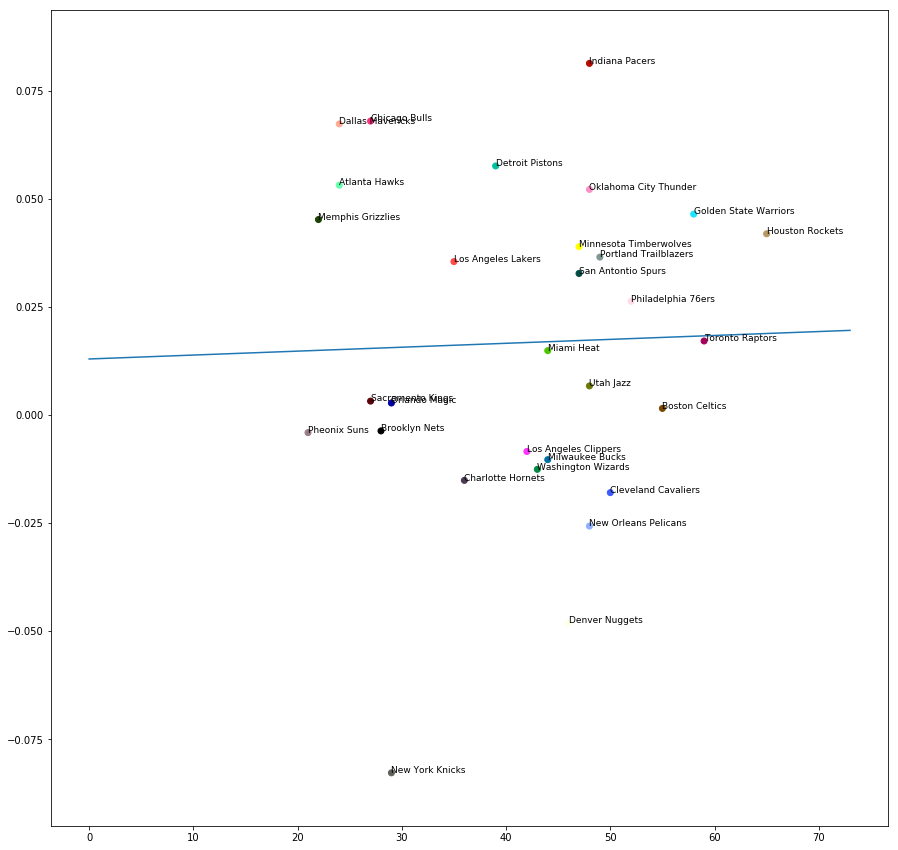

In [62]:
means = []
wins = []

plt.figure(figsize=(15,15))
for player in list(passing_players.values()):
    player_id = players[player]
    team_id = teams[player_id]
    team = team_id_to_team[team_id]
    d_mean, d_median, d_max = assist_ratios_player_win_loss(player_id)
    means.append(d_mean)
    wins.append(num_wins[team])
    plt.annotate(team,(num_wins[team],d_mean),fontsize=9)

plt.scatter(wins,means,c=colors)
b,m,r,p,_ = scipy.stats.linregress(wins,means)
y = np.poly1d([b,m])(np.arange(74))
print(r,p)
plt.plot(np.arange(74),y)
plt.show()

-0.009758887657759127 0.9599290515418747


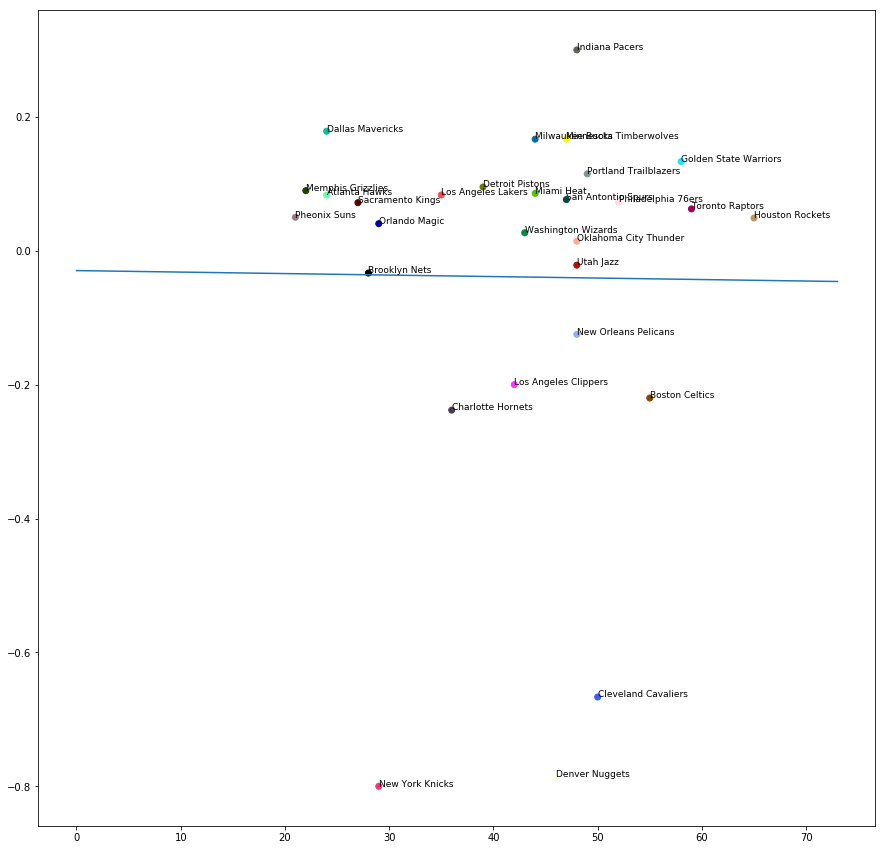

In [63]:
maxs = []
wins = []

plt.figure(figsize=(15,15))
for player in list(passing_players.values()):
    player_id = players[player]
    team_id = teams[player_id]
    team = team_id_to_team[team_id]
    if (team == "Chicago Bulls"):
        continue
    d_mean, d_median, d_max = assist_ratios_player_win_loss(player_id)
    maxs.append(d_max)
    wins.append(num_wins[team])
    plt.annotate(team,(num_wins[team],d_max),fontsize=9)

plt.scatter(wins,maxs,c=colors)
b,m,r,p,_ = scipy.stats.linregress(wins,maxs)
y = np.poly1d([b,m])(np.arange(74))
print(r,p)
plt.plot(np.arange(74),y)
plt.show()